## ML Assignmnet 4

Name: Imaad Hajwane  
SRN: 202101132  
Roll No: 23  
Program: Computer Engineering  
Year: Last year  
Div: A  
Subject: ML  

Q. Write a program to implement bagging and boosting to solve classification problem on datasets.

##### 1. Load and Preprocess the Data


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
# Load the dataset
file_path = 'avocado.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())



   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1           1  20-12-2015          1.35      54876.98   674.28   44638.81   
2           2  13-12-2015          0.93     118220.22   794.70  109149.67   
3           3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4           4  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.isnull().sum()


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
# Preprocess the data
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Encode categorical variables
label_encoders = {}
for column in ['type', 'region']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Drop any rows with missing values (if any)
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop(['AveragePrice', 'Date'], axis=1)
y = df['AveragePrice']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\iamim\AppData\Local\Temp\ipykernel_24820\810139836.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


##### 2. Train-Test Split


##### 3. Implement the KNN Classifier



In [10]:
# Convert 'AveragePrice' to a binary classification target (1 if above median, 0 if below)
median_price = df['AveragePrice'].median()
df['PriceCategory'] = (df['AveragePrice'] > median_price).astype(int)

# Separate features and new target variable
X_classification = df.drop(['AveragePrice', 'Date', 'PriceCategory'], axis=1)
y_classification = df['PriceCategory']

# Scale the features
X_scaled_classification = scaler.fit_transform(X_classification)


In [11]:
# Split the data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled_classification, y_classification, test_size=0.2, random_state=42)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

# Initialize the KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_clf.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = knn_clf.predict(X_test_clf)

# Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
class_report = classification_report(y_test_clf, y_pred_clf)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8780821917808219
Confusion Matrix:
[[1526  267]
 [ 178 1679]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1793
           1       0.86      0.90      0.88      1857

    accuracy                           0.88      3650
   macro avg       0.88      0.88      0.88      3650
weighted avg       0.88      0.88      0.88      3650



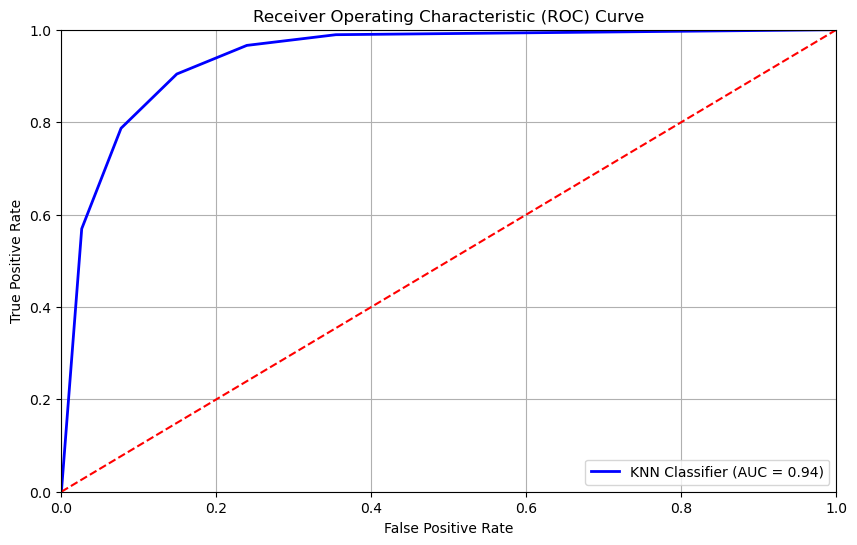

In [16]:
# Calculate the ROC curve and AUC
y_pred_prob = knn_clf.predict_proba(X_test_clf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_clf, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('knn_roc_curve.png')
plt.show()


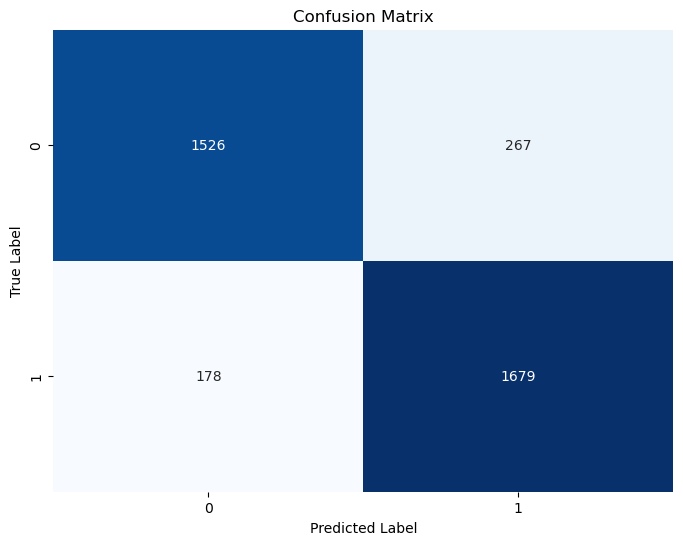

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('knn_confusion_matrix.png', dpi=300)
plt.show()


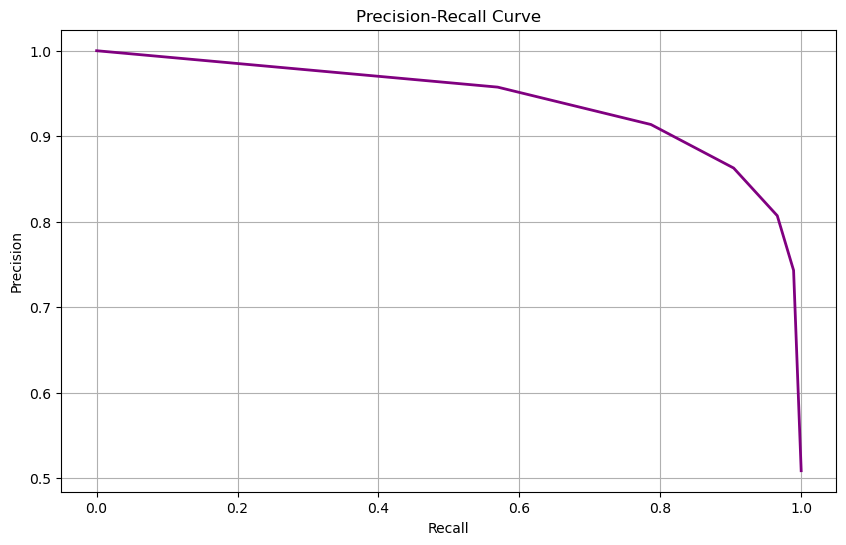

In [20]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_clf, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.savefig('knn_precision_recall_curve.png', dpi=300)
plt.show()


##### Pairplot of Features

c:\Users\iamim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



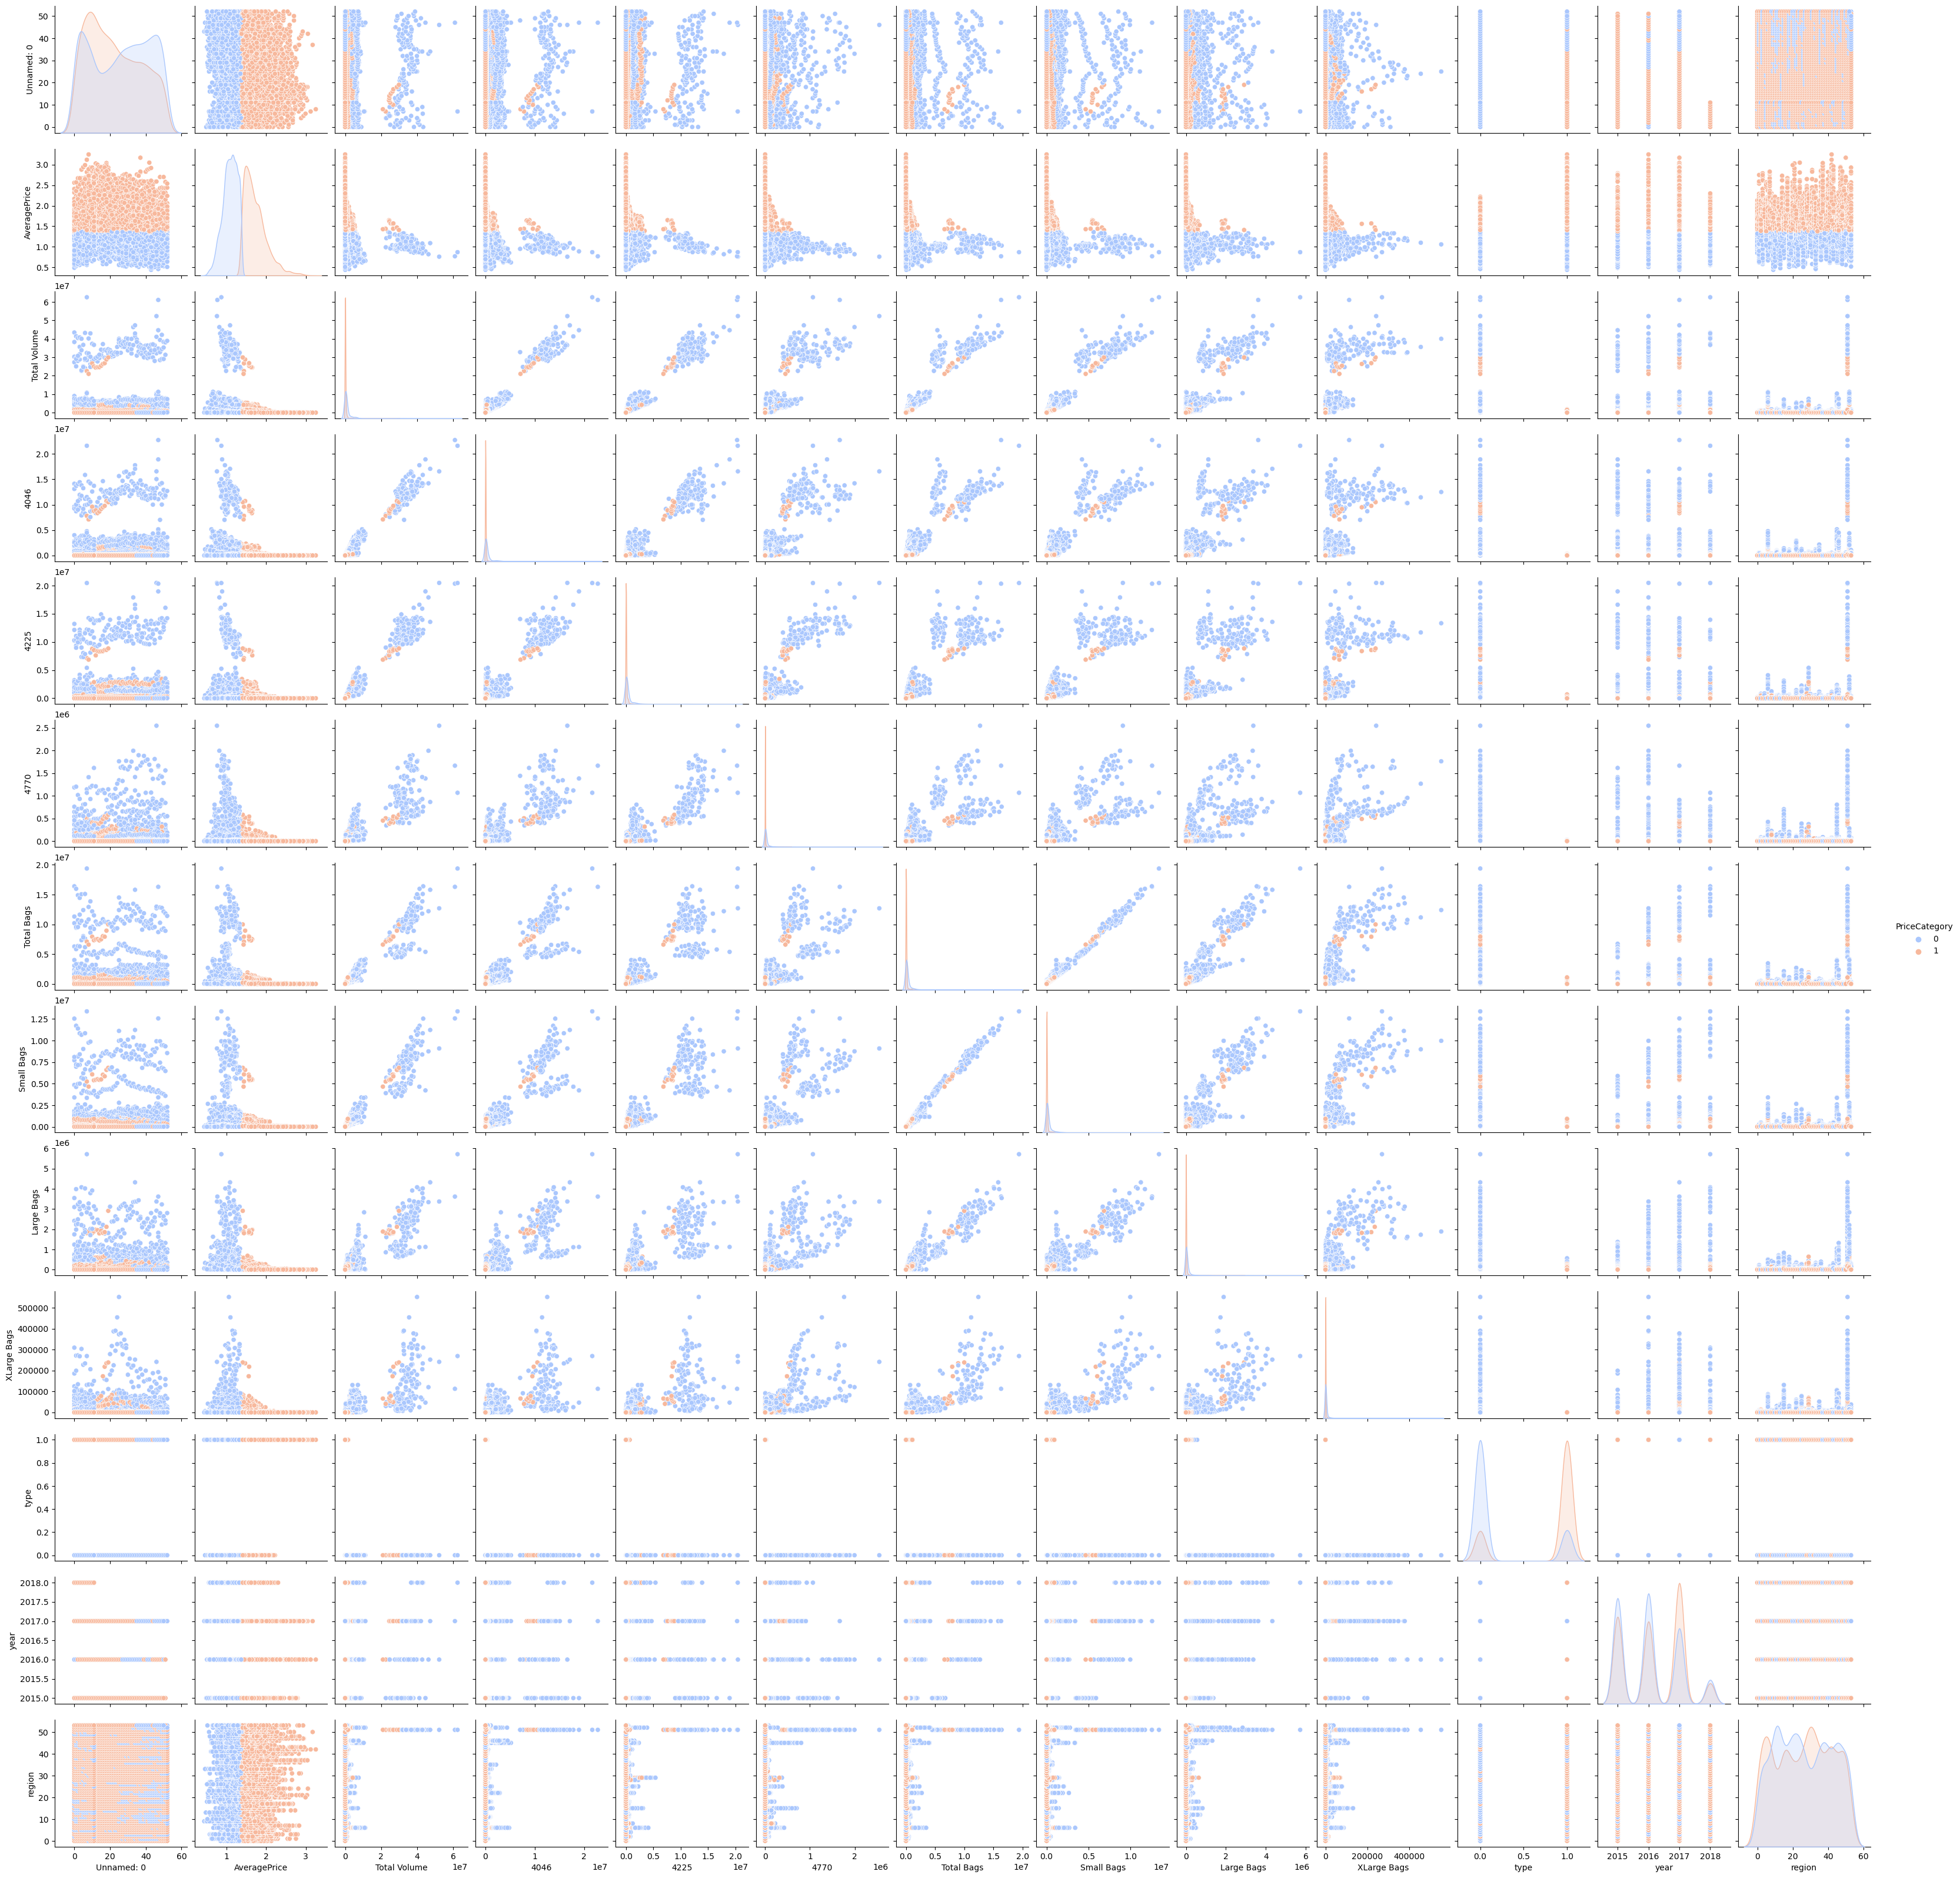

In [21]:
sns.pairplot(df, hue='PriceCategory', palette='coolwarm', diag_kind='kde')
plt.savefig('knn_pairplot.png', dpi=300)
plt.show()


In [22]:
import plotly.express as px

# Confusion Matrix in Plotly
fig_conf_matrix = px.imshow(conf_matrix, text_auto=True, labels={'x': 'Predicted', 'y': 'True'}, title='Confusion Matrix')
fig_conf_matrix.write_html('knn_confusion_matrix.html')

# ROC Curve in Plotly
fig_roc = px.area(x=fpr, y=tpr, title=f'ROC Curve (AUC = {roc_auc:.2f})',
                  labels={'x': 'False Positive Rate', 'y': 'True Positive Rate'},
                  hover_data={'False Positive Rate': fpr, 'True Positive Rate': tpr})
fig_roc.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
fig_roc.write_html('knn_roc_curve.html')

# Precision-Recall Curve in Plotly
fig_pr = px.line(x=recall, y=precision, title='Precision-Recall Curve',
                 labels={'x': 'Recall', 'y': 'Precision'})
fig_pr.write_html('knn_precision_recall_curve.html')


##### Distribution Plot of AveragePrice

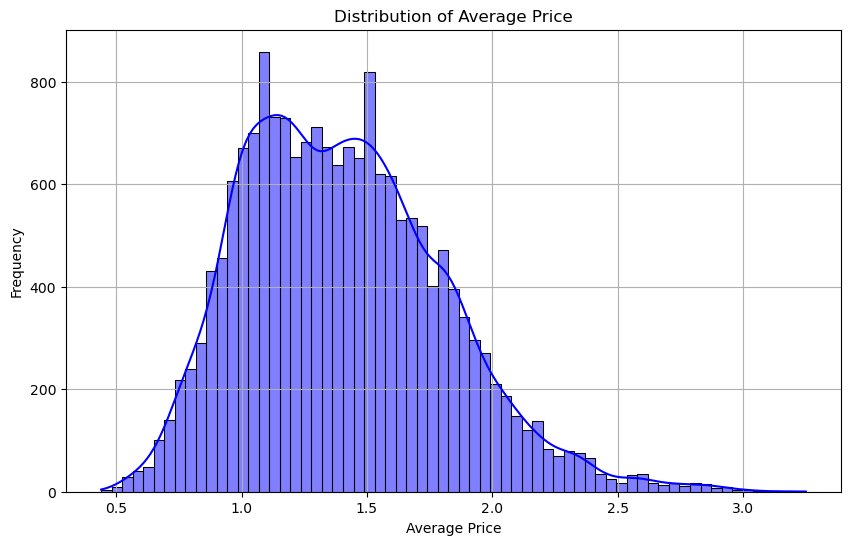

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AveragePrice'], kde=True, color='blue')
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('average_price_distribution.png', dpi=300)
plt.show()


##### Correlation Heatmap

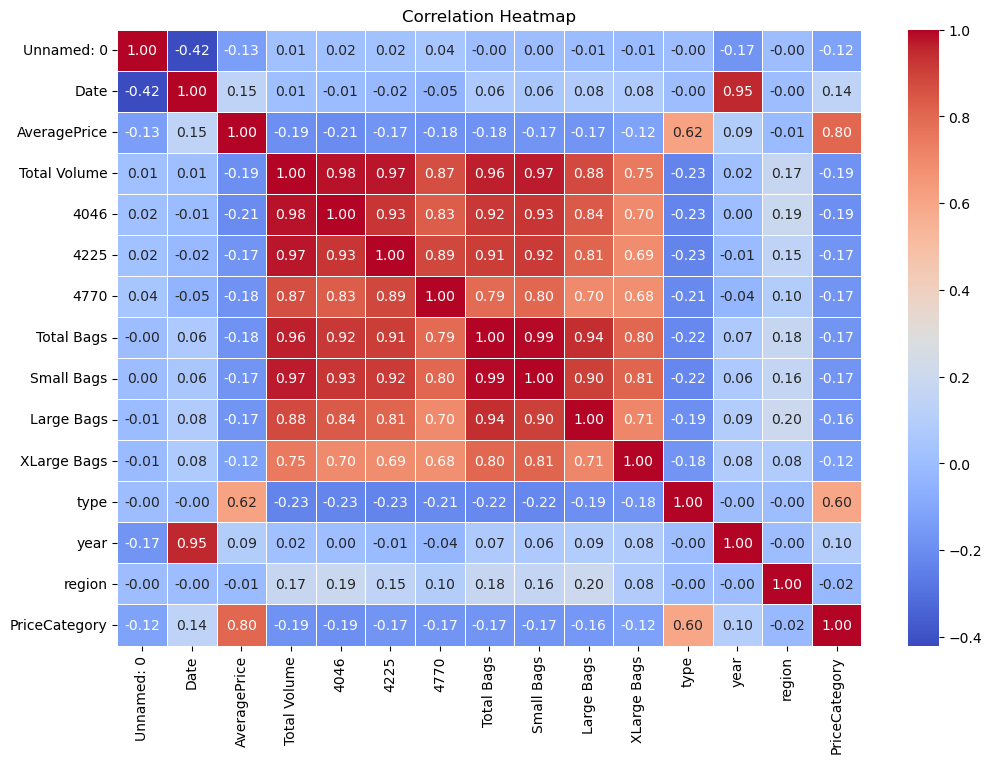

In [24]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()


##### Box Plot of AveragePrice by Region and Type

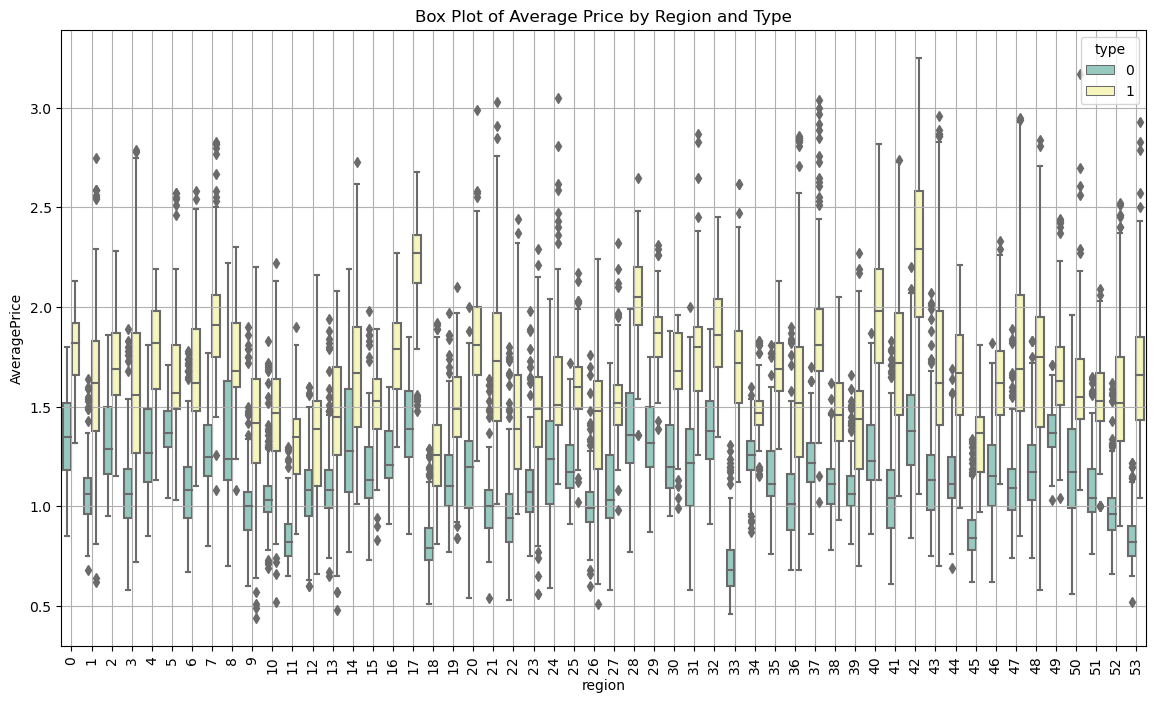

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='region', y='AveragePrice', hue='type', data=df, palette='Set3')
plt.title('Box Plot of Average Price by Region and Type')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('boxplot_average_price_region_type.png', dpi=300)
plt.show()


##### Time Series Plot of AveragePrice

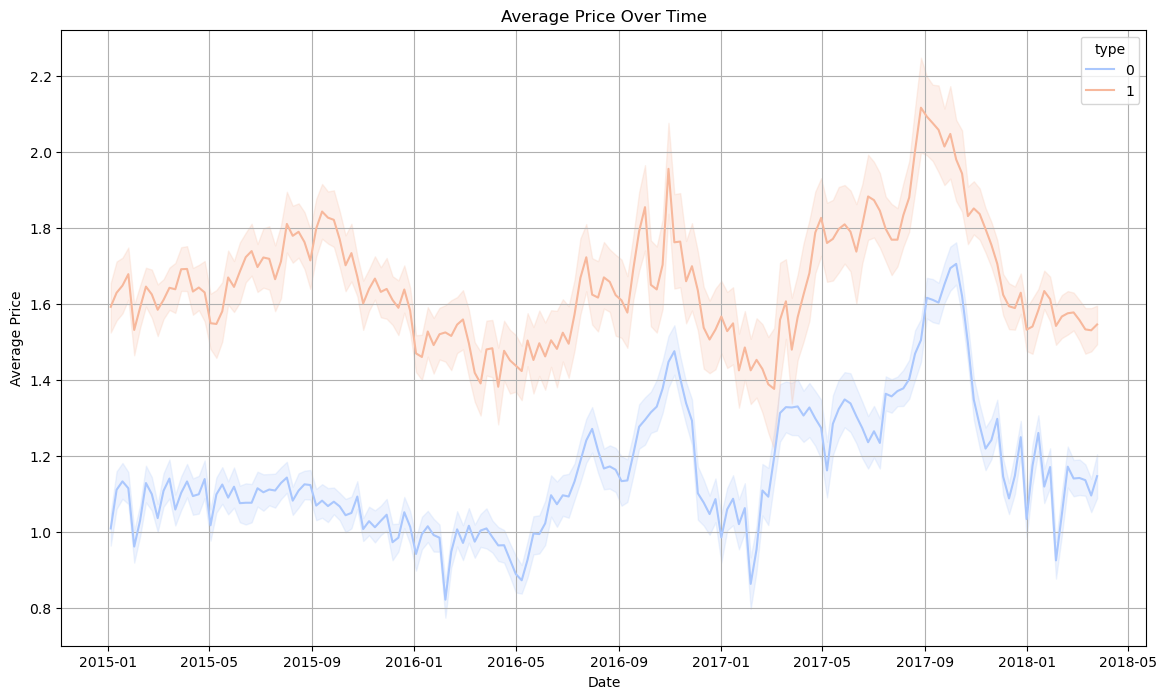

In [26]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='AveragePrice', hue='type', data=df, palette='coolwarm')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.savefig('average_price_over_time.png', dpi=300)
plt.show()


In [27]:
# Distribution Plot using Plotly
fig_dist = px.histogram(df, x='AveragePrice', nbins=50, marginal='box', title='Distribution of Average Price')
fig_dist.write_html('average_price_distribution.html')

# Correlation Heatmap using Plotly
fig_corr = px.imshow(correlation_matrix, text_auto=True, aspect='auto', title='Correlation Heatmap')
fig_corr.write_html('correlation_heatmap.html')

# Box Plot using Plotly
fig_box = px.box(df, x='region', y='AveragePrice', color='type', title='Box Plot of Average Price by Region and Type')
fig_box.update_layout(xaxis_tickangle=-90)
fig_box.write_html('boxplot_average_price_region_type.html')

# Time Series Plot using Plotly
fig_time = px.line(df, x='Date', y='AveragePrice', color='type', title='Average Price Over Time')
fig_time.write_html('average_price_over_time.html')


---------------------------------------------

##### Implementation of Ada boost, Gradient boosting & Random Forest, Bagging classifiers

In [28]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a dictionary to store the accuracy of each model
model_accuracies = {}


###### AdaBoost Classifier

In [29]:
# AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train_clf, y_train_clf)
y_pred_ada = ada_clf.predict(X_test_clf)

# Accuracy and classification report
ada_accuracy = accuracy_score(y_test_clf, y_pred_ada)
model_accuracies['AdaBoost'] = ada_accuracy
print(f"AdaBoost Accuracy: {ada_accuracy:.2f}")
print(classification_report(y_test_clf, y_pred_ada))


AdaBoost Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1793
           1       0.84      0.81      0.83      1857

    accuracy                           0.83      3650
   macro avg       0.83      0.83      0.83      3650
weighted avg       0.83      0.83      0.83      3650



######  Gradient Boosting Classifier

In [30]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train_clf, y_train_clf)
y_pred_gb = gb_clf.predict(X_test_clf)

# Accuracy and classification report
gb_accuracy = accuracy_score(y_test_clf, y_pred_gb)
model_accuracies['Gradient Boosting'] = gb_accuracy
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(classification_report(y_test_clf, y_pred_gb))


Gradient Boosting Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1793
           1       0.87      0.87      0.87      1857

    accuracy                           0.87      3650
   macro avg       0.87      0.87      0.87      3650
weighted avg       0.87      0.87      0.87      3650



###### Random Forest Classifier

In [31]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(X_test_clf)

# Accuracy and classification report
rf_accuracy = accuracy_score(y_test_clf, y_pred_rf)
model_accuracies['Random Forest'] = rf_accuracy
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test_clf, y_pred_rf))


Random Forest Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1793
           1       0.92      0.94      0.93      1857

    accuracy                           0.93      3650
   macro avg       0.93      0.93      0.93      3650
weighted avg       0.93      0.93      0.93      3650



###### Bagging Classifier

In [32]:
# Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train_clf, y_train_clf)
y_pred_bagging = bagging_clf.predict(X_test_clf)

# Accuracy and classification report
bagging_accuracy = accuracy_score(y_test_clf, y_pred_bagging)
model_accuracies['Bagging'] = bagging_accuracy
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.2f}")
print(classification_report(y_test_clf, y_pred_bagging))


c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Bagging Classifier Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1793
           1       0.86      0.91      0.89      1857

    accuracy                           0.88      3650
   macro avg       0.88      0.88      0.88      3650
weighted avg       0.88      0.88      0.88      3650



##### Plot the Accuracies Together

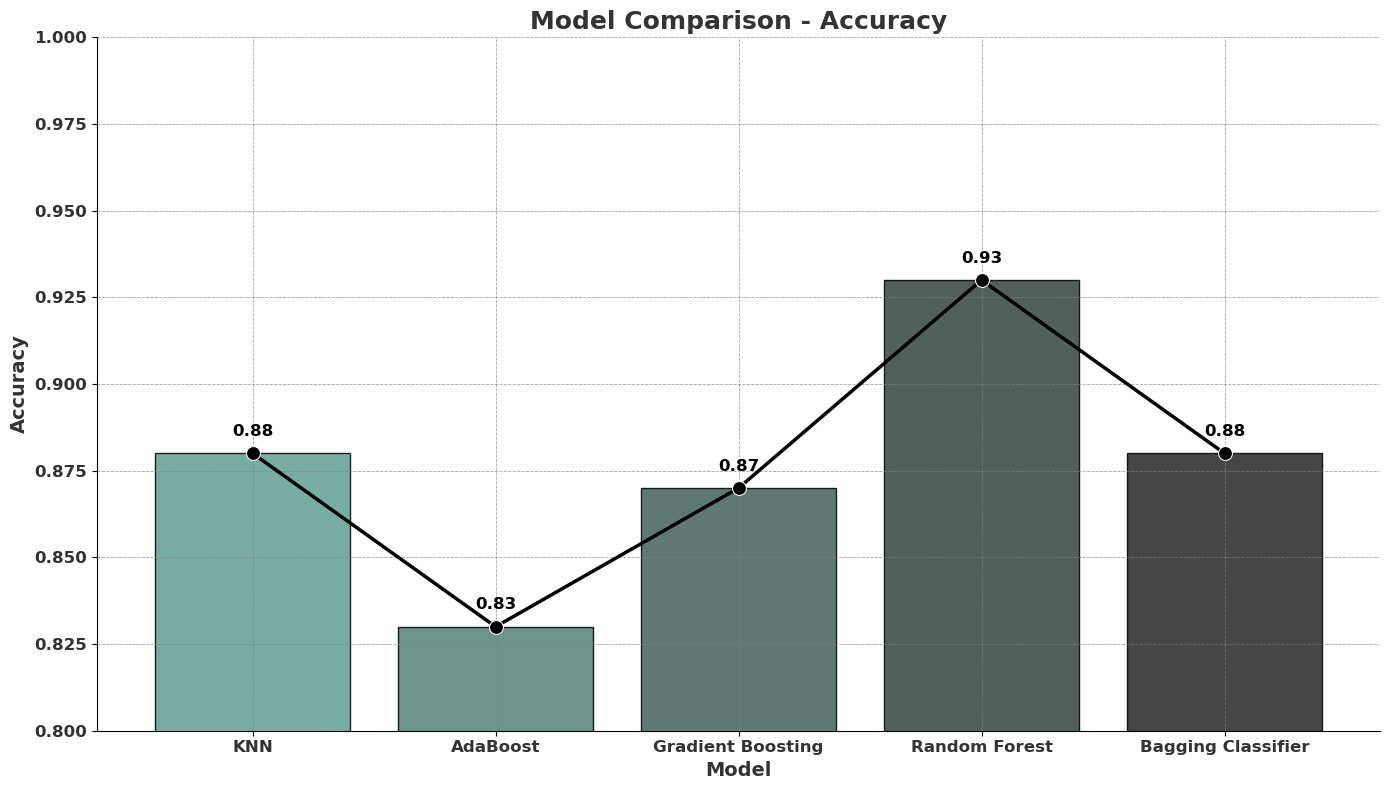

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example model accuracies (replace with your actual data)
model_accuracies = {
    'KNN': 0.88,
    'AdaBoost': 0.83,
    'Gradient Boosting': 0.87,
    'Random Forest': 0.93,
    'Bagging Classifier': 0.88
}

# Professional Plot for Model Comparison
plt.figure(figsize=(14, 8))

# Bar plot for model accuracies
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), 
            palette='dark:#5A9_r', alpha=0.85, edgecolor='black')

# Line plot for model accuracies
sns.lineplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), 
             marker='o', color='black', linewidth=2.5, markersize=10)

# Adding text annotations for each bar
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold', color='black')

plt.title('Model Comparison - Accuracy', fontsize=18, fontweight='bold', color='#333333')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Model', fontsize=14, fontweight='bold', color='#333333')

# Adjusting y-axis limits to ensure all values are visible
plt.ylim(0.80, 1.0)  # Increased lower limit to 0.80

plt.xticks(fontsize=12, fontweight='bold', color='#333333')
plt.yticks(fontsize=12, fontweight='bold', color='#333333')

# Adding subtle grid lines
plt.grid(True, which='major', linestyle='--', linewidth=0.6, color='grey', alpha=0.7)

# Remove top and right borders
sns.despine()

plt.tight_layout()

# Save the plot with higher DPI for better quality
plt.savefig('professional_model_comparison_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()





##### Displaying Classification Reports

In [44]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Example predictions and true labels (replace with your actual data)
# y_test_clf, y_pred_clf, y_pred_ada, y_pred_gb, y_pred_rf, y_pred_bagging should be defined

# Store the classification reports and accuracies in dictionaries
classification_reports = {
    'KNN': classification_report(y_test_clf, y_pred_clf, output_dict=True),
    'AdaBoost': classification_report(y_test_clf, y_pred_ada, output_dict=True),
    'Gradient Boosting': classification_report(y_test_clf, y_pred_gb, output_dict=True),
    'Random Forest': classification_report(y_test_clf, y_pred_rf, output_dict=True),
    'Bagging': classification_report(y_test_clf, y_pred_bagging, output_dict=True)
}

accuracies = {
    'KNN': accuracy_score(y_test_clf, y_pred_clf),
    'AdaBoost': accuracy_score(y_test_clf, y_pred_ada),
    'Gradient Boosting': accuracy_score(y_test_clf, y_pred_gb),
    'Random Forest': accuracy_score(y_test_clf, y_pred_rf),
    'Bagging': accuracy_score(y_test_clf, y_pred_bagging)
}

# Convert the reports into DataFrames
reports_df = {model: pd.DataFrame(report).transpose() for model, report in classification_reports.items()}

# Add accuracy as a new row to each DataFrame
for model, df in reports_df.items():
    df.loc['accuracy', :] = pd.Series(accuracies[model], index=df.columns)

# Add accuracy to the classification report for clarity
for model, df in reports_df.items():
    df.loc['accuracy', :] = pd.Series(accuracies[model], index=df.columns)

# Create a DataFrame for accuracies
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy']).set_index('Model')

# Combine the DataFrames into a single DataFrame for better visualization
combined_report_df = pd.concat(reports_df, axis=1)

# Append the accuracies DataFrame to the combined report DataFrame
combined_report_df = pd.concat([combined_report_df, accuracy_df.T], axis=0)

# Display the combined classification report
with pd.option_context('display.max_columns', None):  # to display all columns
    print(combined_report_df)


              (KNN, precision)  (KNN, recall)  (KNN, f1-score)  \
0                     0.895540       0.851088         0.872748   
1                     0.862795       0.904146         0.882987   
accuracy              0.878082       0.878082         0.878082   
macro avg             0.879168       0.877617         0.877868   
weighted avg          0.878881       0.878082         0.877957   
Accuracy                   NaN            NaN              NaN   

              (KNN, support)  (AdaBoost, precision)  (AdaBoost, recall)  \
0                1793.000000               0.813678            0.842722   
1                1857.000000               0.842722            0.813678   
accuracy            0.878082               0.827945            0.827945   
macro avg        3650.000000               0.828200            0.828200   
weighted avg     3650.000000               0.828454            0.827945   
Accuracy                 NaN                    NaN                 NaN   

           